In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
from google.colab import files
# use seaborn plotting defaults
import seaborn as sns; sns.set()
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Prediction.csv']))

In [ ]:
heart_Disease_with_name = df['Heart Disease']

In [ ]:

df['Heart Disease'] = df['Heart Disease'].astype('category').cat.codes
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
from scipy.stats import entropy
entropy(df, base=2)

array([8.05626001, 7.51569984, 8.00261917, 8.06381748, 8.04732331,
       5.32192809, 7.11577083, 8.05890117, 6.47573343, 7.18451977,
       7.97140162, 6.63607317, 7.95531527, 6.9068906 ])

In [ ]:
numeric= ['Age','Sex','BP','FBS over 120','Cholesterol','Max HR','ST depression','Number of vessels fluro','Heart Disease',]

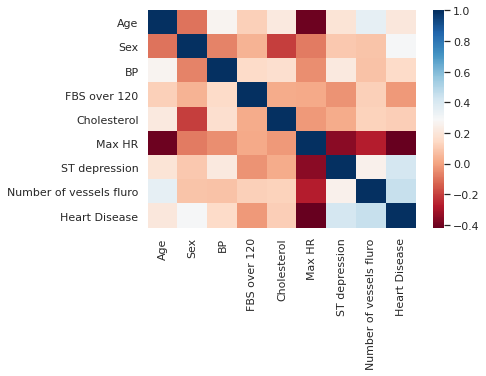

In [ ]:
sn.heatmap(df[numeric].corr(),cmap='RdBu')

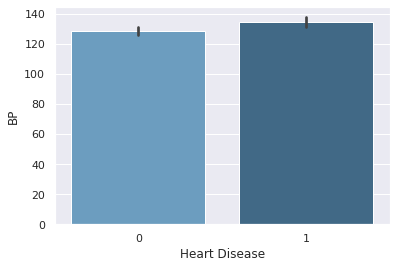

In [ ]:
#sn.barplot(x=df['Heart Disease'],y=df['BP'],pallet= sns.color_palette("vlag", as_cmap=True))
sn.barplot(x=df['Heart Disease'],y=df['BP'],data=df,palette="Blues_d")


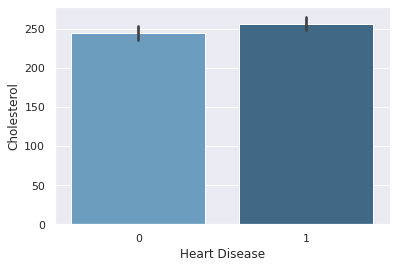

In [ ]:
sn.barplot(x=df['Heart Disease'],y=df['Cholesterol'],data=df, palette="Blues_d")

In [ ]:
df6 = {'Age and Sex':[],'Heart Disease':[]}
j=0
for i in df['Age']:
  if i<=50 :
    if df['Sex'][j] == 0:
      df6['Age and Sex'].append('A')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df6['Age and Sex'].append('C')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
  if i>50 :
    if df['Sex'][j] == 0:
      df6['Age and Sex'].append('B')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df6['Age and Sex'].append('D')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
  
  
df7 = pd.DataFrame.from_dict(df6)
df7 

,Age and Sex,Heart Disease
0,D,1
1,B,0
2,D,1
3,D,0
4,B,0
...,...,...
265,D,0
266,C,0
267,B,0
268,D,0


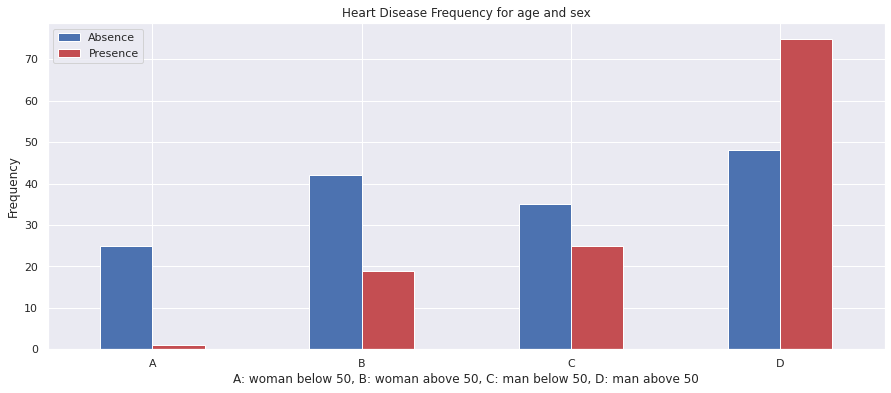

In [ ]:
pd.crosstab(df7['Age and Sex'],df7['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])#8
plt.title('Heart Disease Frequency for age and sex')
plt.xlabel('A: woman below 50, B: woman above 50, C: man below 50, D: man above 50')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

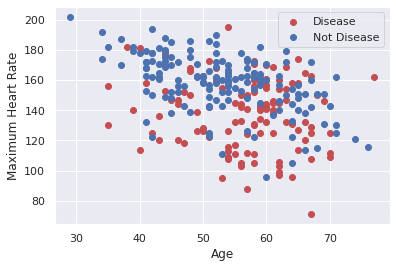

In [ ]:
plt.scatter(x=df.Age[df['Heart Disease']==1], y=df['Max HR'][(df['Heart Disease']==1)], c="r")#6
plt.scatter(x=df.Age[df['Heart Disease']==0], y=df['Max HR'][(df['Heart Disease']==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
df6 = {'Age and Sex':[],'Heart Disease':[]}
j=0
for i in df['Age']:
  if i<=50 :
    if df['Sex'][j] == 0:
      df6['Age and Sex'].append('A')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df6['Age and Sex'].append('C')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
  if i>50 :
    if df['Sex'][j] == 0:
      df6['Age and Sex'].append('B')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df6['Age and Sex'].append('D')
      df6['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
  
  
df7 = pd.DataFrame.from_dict(df6)
df7 

,Age and Sex,Heart Disease
0,D,1
1,B,0
2,D,1
3,D,0
4,B,0
...,...,...
265,D,0
266,C,0
267,B,0
268,D,0


In [ ]:
pd.crosstab(df7['Age and Sex'],df7['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])#7
plt.title('Heart Disease Frequency for age and sex')
plt.xlabel('A: woman below 50, B: woman above 50, C: man below 50, D: man above 50')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

NameError: ignored

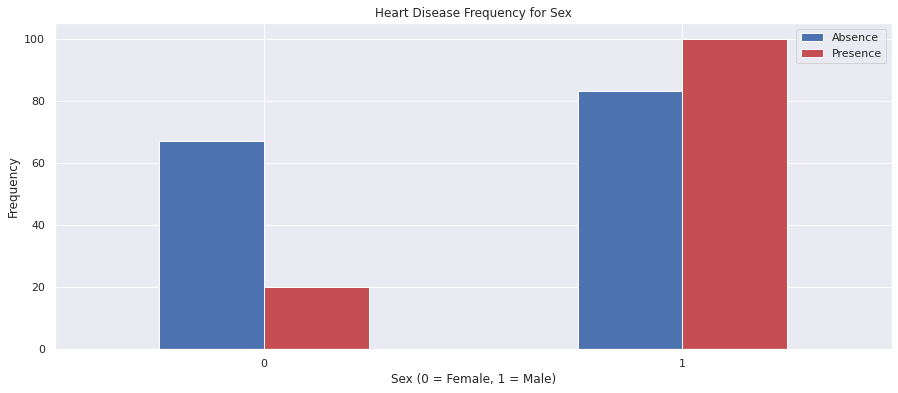

In [ ]:
pd.crosstab(df.Sex,df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r' ])#4
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
df1 = {'Cholesterol':[],'Heart Disease':[]}
j=0
for i in df['Cholesterol']:
  if i<200:
    df1['Cholesterol'].append('A')
    df1['Heart Disease'].append(df['Heart Disease'][j])
    j+=1
  if (i>= 200 and i<=239) :
    df1['Cholesterol'].append('B')
    df1['Heart Disease'].append(df['Heart Disease'][j])
    j+=1
  if i>= 240 :
    df1['Cholesterol'].append('C')
    df1['Heart Disease'].append(df['Heart Disease'][j])
    j+=1

#df2 = pd.DataFrame(df1,columns=['Cholesterol','Heart Disease']
df2 = pd.DataFrame.from_dict(df1)
df2 

,Cholesterol,Heart Disease
0,C,1
1,C,0
2,C,1
3,C,0
4,C,0
...,...,...
265,A,0
266,C,0
267,C,0
268,A,0


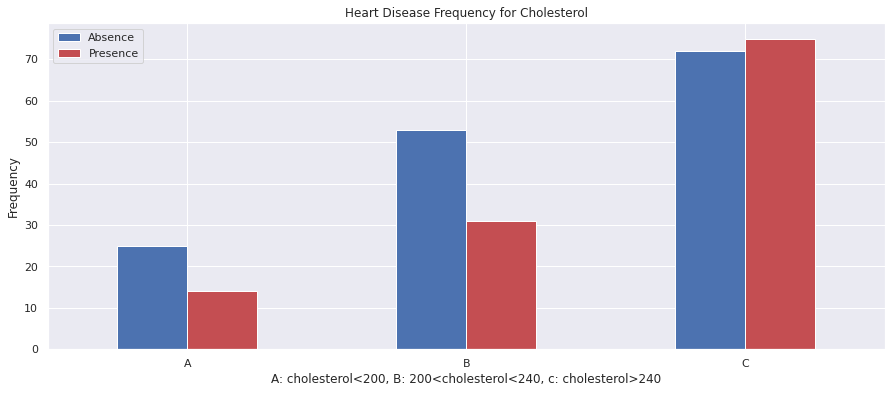

In [ ]:
pd.crosstab(df2.Cholesterol,df2['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Cholesterol')
plt.xlabel('A: cholesterol<200, B: 200<cholesterol<240, c: cholesterol>240')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
df10 = {'Cholesterol and Thallium':[],'Heart Disease':[]}
j=0
for i in df['Cholesterol']:
  if i<200:
    if df['Thallium'][j] == 3:
      df10['Cholesterol and Thallium'].append('C<200, T=3')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df10['Cholesterol and Thallium'].append('C<200, T=6')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
        df10['Cholesterol and Thallium'].append('C<200, T=7')
        df10['Heart Disease'].append(df['Heart Disease'][j])
        j+=1 
  if (i>= 200 and i<=239) :
    if df['Thallium'][j] == 3:
      df10['Cholesterol and Thallium'].append('200<C<240, T=3')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df10['Cholesterol and Thallium'].append('200<C<240, T=6')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df10['Cholesterol and Thallium'].append('200<C<240, T=7')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1 
  if i>= 240 :
    if df['Thallium'][j] == 3:
      df10['Cholesterol and Thallium'].append('C>240, T=3')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df10['Cholesterol and Thallium'].append('C>240, T=6')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df10['Cholesterol and Thallium'].append('C>240, T=7')
      df10['Heart Disease'].append(df['Heart Disease'][j])
      j+=1 

#df2 = pd.DataFrame(df1,columns=['Cholesterol','Heart Disease']
df11 = pd.DataFrame.from_dict(df10)
df11

,Cholesterol and Thallium,Heart Disease
0,"C>240, T=3",1
1,"C>240, T=7",0
2,"C>240, T=7",1
3,"C>240, T=7",0
4,"C>240, T=3",0
...,...,...
265,"C<200, T=7",0
266,"C>240, T=7",0
267,"C>240, T=3",0
268,"C<200, T=6",0


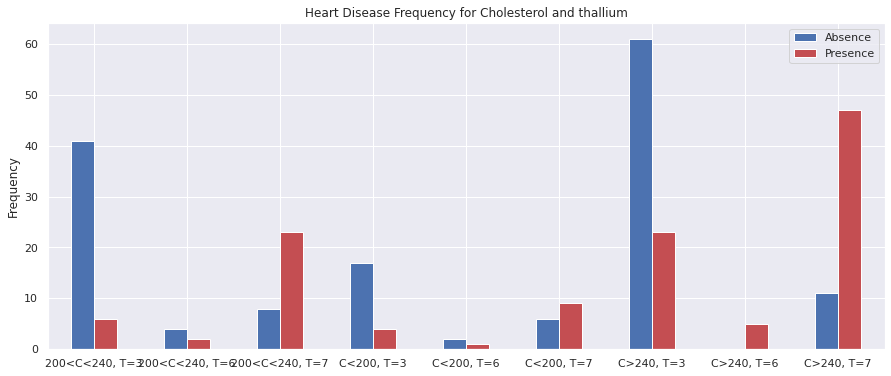

In [ ]:
pd.crosstab(df11['Cholesterol and Thallium'],df11['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Cholesterol and thallium')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
df12 = {'EKG and Thallium':[],'Heart Disease':[]}
j=0
for i in df['EKG results']:
  if i==0:
    if df['Thallium'][j] == 3:
      df12['EKG and Thallium'].append('EKG=0, T=3')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df12['EKG and Thallium'].append('EKG=0, T=6')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
        df12['EKG and Thallium'].append('EKG=0, T=7')
        df12['Heart Disease'].append(df['Heart Disease'][j])
        j+=1 
  if i==1 :
    if df['Thallium'][j] == 3:
      df12['EKG and Thallium'].append('EKG=1, T=3')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df12['EKG and Thallium'].append('EKG=1, T=6')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df12['EKG and Thallium'].append('EKG=1, T=7')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1 
  if i==2 :
    if df['Thallium'][j] == 3:
      df12['EKG and Thallium'].append('EKG=2, T=3')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    elif df['Thallium'][j] == 6:
      df12['EKG and Thallium'].append('EKG=2, T=6')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1
    else:
      df12['EKG and Thallium'].append('EKG=2, T=7')
      df12['Heart Disease'].append(df['Heart Disease'][j])
      j+=1 

#df2 = pd.DataFrame(df1,columns=['Cholesterol','Heart Disease']
df13 = pd.DataFrame.from_dict(df12)
df13

,EKG and Thallium,Heart Disease
0,"EKG=2, T=3",1
1,"EKG=2, T=7",0
2,"EKG=0, T=7",1
3,"EKG=0, T=7",0
4,"EKG=2, T=3",0
...,...,...
265,"EKG=0, T=7",0
266,"EKG=0, T=7",0
267,"EKG=2, T=3",0
268,"EKG=0, T=6",0


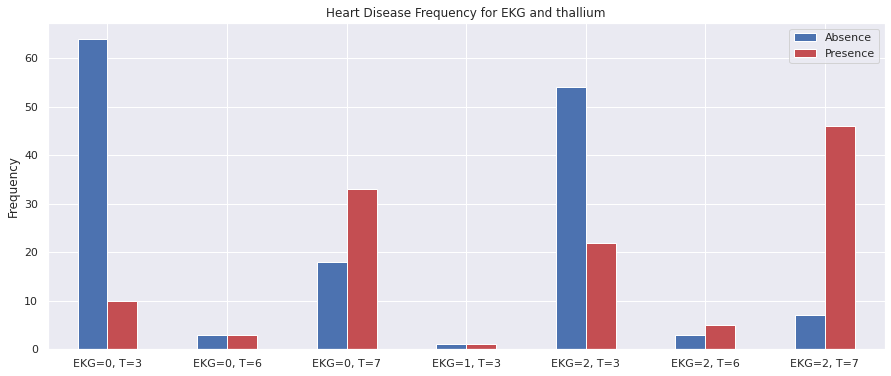

In [ ]:
pd.crosstab(df13['EKG and Thallium'],df13['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for EKG and thallium')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

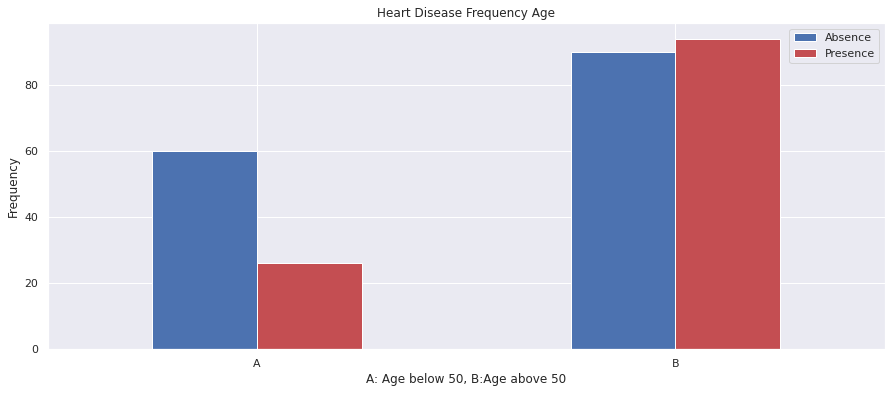

In [ ]:
df3 = {'Age':[],'Heart Disease':[]}#9 אולי לא צריך
j=0
for i in df['Age']:
  if i<=50:
    df3['Age'].append('A')
    df3['Heart Disease'].append(df['Heart Disease'][j])
    j+=1
  if i>50 :
    df3['Age'].append('B')
    df3['Heart Disease'].append(df['Heart Disease'][j])
    j+=1

df4 = pd.DataFrame.from_dict(df3)
df4 
pd.crosstab(df4.Age,df4['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency Age')
plt.xlabel('A: Age below 50, B:Age above 50')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

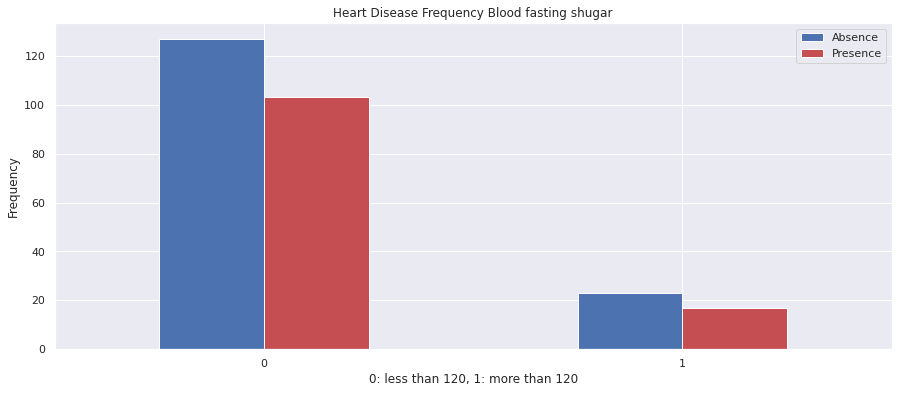

In [ ]:
pd.crosstab(df['FBS over 120'],df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency Blood fasting sugar')
plt.xlabel('0: less than 120, 1: more than 120')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

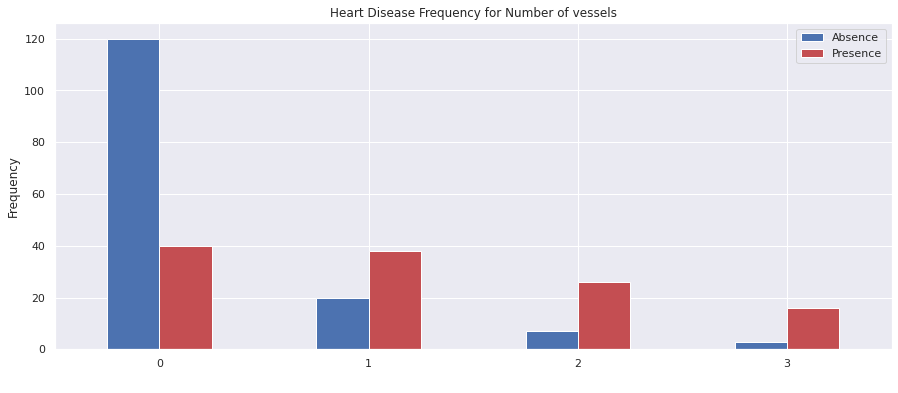

In [ ]:
pd.crosstab(df['Number of vessels fluro'],df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Number of vessels')
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns = ['EKG results','Thallium','Slope of ST'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,EKG results_0,EKG results_1,EKG results_2,Thallium_3,Thallium_6,Thallium_7,Slope of ST_1,Slope of ST_2,Slope of ST_3
0,70,1,4,130,322,0,109,0,2.4,3,1,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,160,0,1.6,0,0,0,0,1,0,0,1,0,1,0
2,57,1,2,124,261,0,141,0,0.3,0,1,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,105,1,0.2,1,0,1,0,0,0,0,1,0,1,0
4,74,0,2,120,269,0,121,1,0.2,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,162,0,0.5,0,0,1,0,0,0,0,1,1,0,0
266,44,1,2,120,263,0,173,0,0.0,0,0,1,0,0,0,0,1,1,0,0
267,56,0,2,140,294,0,153,0,1.3,0,0,0,0,1,1,0,0,0,1,0
268,57,1,4,140,192,0,148,0,0.4,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
features = ['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','Max HR','Exercise angina','EKG results_0','EKG results_1','EKG results_2','ST depression','Slope of ST_1','Slope of ST_2','Slope of ST_3','Number of vessels fluro','Thallium_3','Thallium_6','Thallium_7']
x_data= df[features]
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values #נרמול
y = df['Heart Disease'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, test_size=0.30)



In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Mean Error')

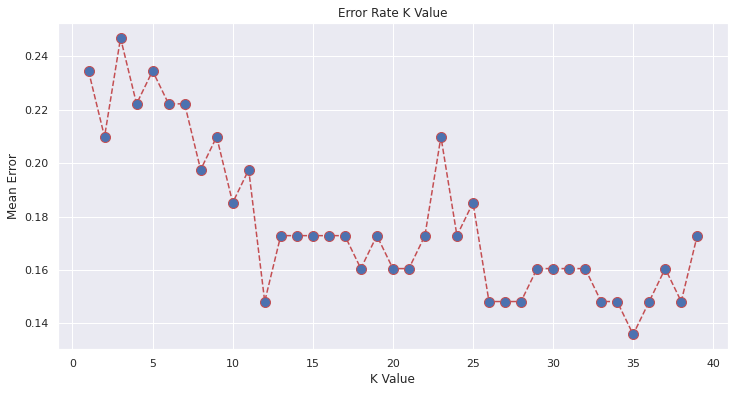

In [ ]:
error = []
for i in range(1, 40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color= 'r', linestyle='dashed', marker = 'o', markerfacecolor='b', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [ ]:
y_pred  = classifier.predict(X_test)

In [ ]:
knn = np.mean(y_test == y_pred)
knn

0.8641975308641975

In [ ]:
cf_knn=confusion_matrix(y_test, y_pred)
cf_knn

array([[43,  5],
       [ 6, 27]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.84      0.82      0.83        33

    accuracy                           0.86        81
   macro avg       0.86      0.86      0.86        81
weighted avg       0.86      0.86      0.86        81



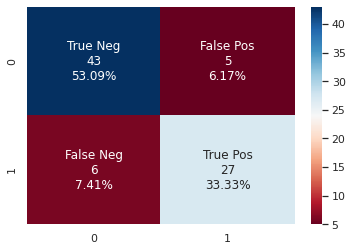

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_knn.flatten()/np.sum(cf_knn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_knn, annot=labels, fmt='', cmap='RdBu')

In [ ]:
knn_probs = classifier.predict_proba(X_test)
knn_probs[:10,:]
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(y_test, knn_probs)
knnfpr, knntpr, knn_thresholds = roc_curve(y_test, knn_probs)

SVM

In [ ]:

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)




In [ ]:
from sklearn import svm
#svmm = svm.SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(x_train,y_train)
svmm = svm.SVC(kernel='rbf',probability=True)
svmm.fit(X_train,y_train)
y_pred_svm = svmm.predict(X_test)
svm = np.mean(y_test == y_pred_svm)
svm

0.7901234567901234

In [ ]:
cf_svm=confusion_matrix(y_test, y_pred_svm)
cf_svm

array([[36, 12],
       [ 5, 28]])

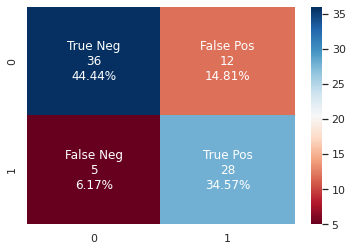

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_svm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_svm.flatten()/np.sum(cf_svm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_svm, annot=labels, fmt='', cmap='RdBu')

In [ ]:
svm_probs = svmm.predict_proba(X_test)
svm_probs[:10,:]
svm_probs = svm_probs[:,1]
svm_auc = roc_auc_score(y_test, svm_probs)
svmfpr, svmtpr, svm_thresholds = roc_curve(y_test, svm_probs)


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

rfofest = rf.score(X_test,y_test)
rfofest

0.8024691358024691

In [ ]:

y_head_rf = rf.predict(X_test)

In [ ]:

cm_rf = confusion_matrix(y_test,y_head_rf)
print(cm_rf)

[[38 10]
 [ 6 27]]


In [ ]:

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[4]
# Saving feature names for later use
feature_list = list(x_data.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
from google.colab import files
files.download("tree.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

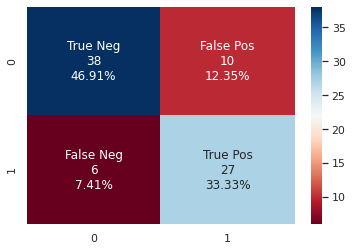

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf, annot=labels, fmt='', cmap='RdBu')

In [ ]:
rf_probs = rf.predict_proba(X_test)
rf_probs[:10,:]
rf_probs = rf_probs[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)
rffpr, rftpr, rf_thresholds = roc_curve(y_test, rf_probs)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

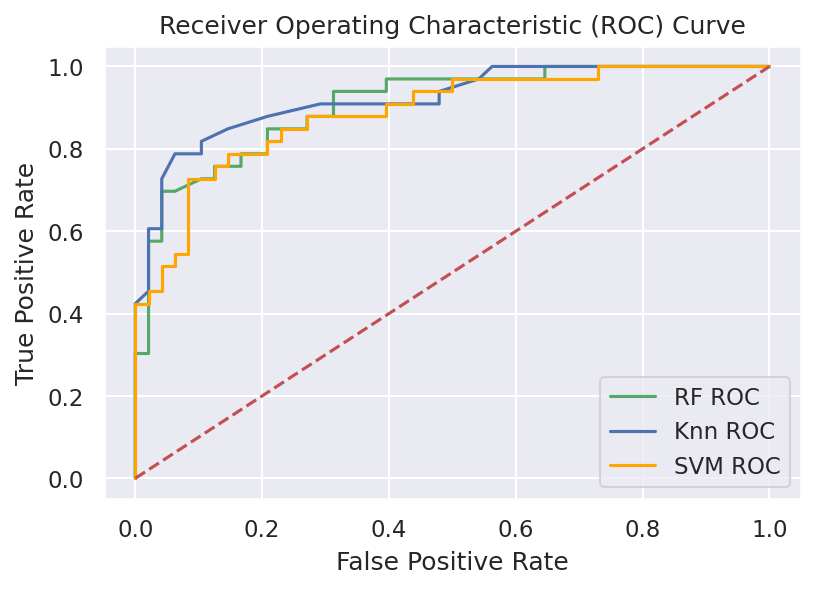

In [ ]:
plt.figure(dpi=150)
plt.plot(rffpr, rftpr, color='g', label='RF ROC')
plt.plot(knnfpr, knntpr, color='b', label='Knn ROC')
plt.plot(svmfpr, svmtpr, color='orange', label='SVM ROC')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [ ]:
rf_auc

0.9065656565656566

In [ ]:
knn_auc

0.9217171717171717

In [ ]:
svm_auc

0.8876262626262627

In [ ]:
final = {'Knn':knn*100,'RF':rfofest*100,'SVM':svm*100}

final

{'Knn': 74.07407407407408, 'RF': 70.37037037037037, 'SVM': 72.8395061728395}

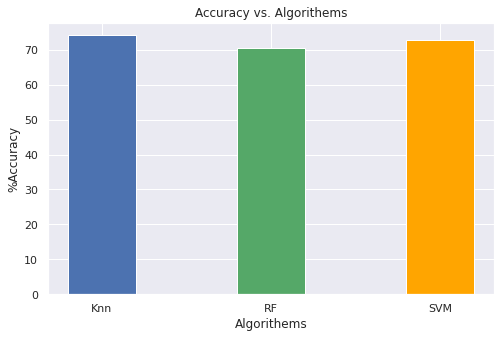

In [ ]:

Algorithems = list(final.keys()) 
Accuracy = list(final.values()) 
   
fig = plt.figure(figsize = (8, 5)) 
  
# creating the bar plot 
plt.bar(Algorithems, Accuracy, color=('b','g','orange'),  
        width = 0.4) 
  
plt.xlabel("Algorithems") 
plt.ylabel("%Accuracy") 
plt.title("Accuracy vs. Algorithems") 
plt.show()